In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path_train = r'C:\Users\josep\OneDrive\Escritorio\Proyectos-Junior\DataSet-Kaggle\Proyecto-3-Online-Retail\Online Retail.xlsx'

In [3]:
df_train = pd.read_excel(path_train)

In [4]:
df_train.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## LIMPIEZA


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#Reemplazando margen de error de productos no registrados
df_train['Description'].fillna("No registro", inplace=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_12564\459470568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Description'].fillna("No registro", inplace=True)


In [7]:
#Agregar una secuiancia de 01-02-03 en los identificacdores de clientes para no perder datos
num_missing = df_train['CustomerID'].isna().sum()
sequence = [f"{i:02d}" for i in range(1, num_missing + 1)]
df_train.loc[df_train['CustomerID'].isna(), 'CustomerID'] = sequence

C:\Users\josep\AppData\Local\Temp\ipykernel_12564\1036004912.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129',

In [8]:
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'], errors='coerce')


In [9]:
df_train['Año'] = df_train['InvoiceDate'].dt.year
df_train['Mes'] = df_train['InvoiceDate'].dt.month


In [10]:
df_train['Año-Mes'] = df_train['InvoiceDate'].dt.strftime('%Y-%m')  # Formato correcto


## 1️⃣ Rendimiento de ventas y demanda

## ¿Existen productos con una demanda volátil o estacional?

In [11]:
# Agrupar por producto y mes, luego contar la cantidad de ventas por mes
volatilidad_productos = df_train.groupby(['Description', 'Año', 'Mes'])['Quantity'].sum().reset_index()

# Calcular la desviación estándar para cada producto
volatilidad = volatilidad_productos.groupby('Description')['Quantity'].std().reset_index()

# Ordenar productos de mayor a menor volatilidad
volatilidad = volatilidad.sort_values(by='Quantity', ascending=False)

# Ver los productos más volátiles
print(volatilidad.head(10))


                              Description     Quantity
2804                   RABBIT NIGHT LIGHT  4927.154119
1123                              Damaged  4165.391018
275        ASSTD DESIGN 3D PAPER STICKERS  3754.295949
2741                       POPCORN HOLDER  3665.739346
2304                          No registro  3389.307497
4010    WORLD WAR 2 GLIDERS ASSTD DESIGNS  2533.673797
3016  ROTATING SILVER ANGELS T-LIGHT HLDR  2313.135548
2440      PAPER CHAIN KIT 50'S CHRISTMAS   2232.609758
4117                                check  2156.357345
3470                 SMALL POPCORN HOLDER  2022.897768


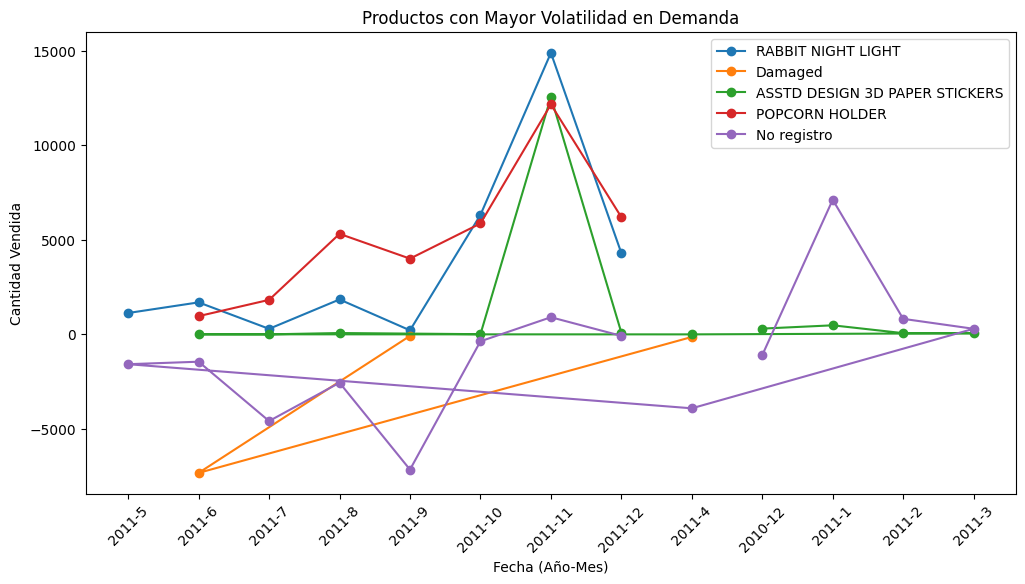

In [12]:

# Seleccionar los 5 productos con mayor volatilidad
top_volatiles = volatilidad.head(5)['Description'].tolist()
df_top = volatilidad_productos[volatilidad_productos['Description'].isin(top_volatiles)]

# Ordenar los datos por fecha
df_train = df_train.sort_values(by='Año-Mes')

# Graficar la demanda de estos productos a lo largo del tiempo
plt.figure(figsize=(12, 6))
for product in top_volatiles:
    product_data = df_top[df_top['Description'] == product]
    plt.plot(product_data['Año'].astype(str) + '-' + product_data['Mes'].astype(str), product_data['Quantity'], marker='o', label=product)

plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad Vendida")
plt.title("Productos con Mayor Volatilidad en Demanda")
plt.legend()
plt.show()



Para analizar la volatilidad en la demanda de los productos en el gráfico, podemos considerar los siguientes aspectos:

1. Definición de Volatilidad
La volatilidad en la demanda se refiere a la variabilidad de las ventas a lo largo del tiempo. Un producto con alta volatilidad tendrá picos y caídas abruptas en su cantidad vendida, mientras que un producto con baja volatilidad mostrará un comportamiento más estable.

2. Identificación de Productos con Alta Volatilidad
Podemos observar que:

RABBIT NIGHT LIGHT (azul) y POPCORN HOLDER (rojo) presentan picos y caídas pronunciadas, indicando alta volatilidad.
ASSTD DESIGN 3D PAPER STICKERS (verde) muestra un fuerte incremento en 2011-11, seguido de una caída abrupta, lo que también indica alta volatilidad.
No registro (morado) tiene variaciones negativas y cambios bruscos, lo que puede deberse a registros erróneos o devoluciones.
Damaged (naranja) muestra una tendencia creciente sin cambios abruptos, indicando menor volatilidad.
3. Cálculo de la Volatilidad
Para cuantificar la volatilidad, podemos usar métricas estadísticas como:

Desviación estándar: mide cuánto varían las ventas de un producto respecto a su promedio.
Coeficiente de variación (CV): es la desviación estándar dividida por la media, útil para comparar volatilidades entre productos con diferentes niveles de venta.

1. Agrupar los datos por producto y mes

In [13]:
# Asegurarnos de que 'InvoiceDate' es de tipo fecha
df_train["InvoiceDate"] = pd.to_datetime(df_train["InvoiceDate"])

# Agrupar por StockCode y Año-Mes para calcular la cantidad total vendida por producto y mes
df_grouped = df_train.groupby(["StockCode", "Año-Mes"])["Quantity"].sum().reset_index()

2. Calcular la volatilidad

In [14]:
# Función para calcular la volatilidad (std y CV) de cada producto
volatility_data = df_grouped.groupby("StockCode")["Quantity"].agg(["mean", "std"]).reset_index()

# Evitar división por 0 en CV (cuando la media es 0)
volatility_data["CV"] = volatility_data["std"] / volatility_data["mean"]
volatility_data["CV"].replace([float("inf"), -float("inf")], 0, inplace=True)

# Ordenar productos por volatilidad descendente
volatility_data = volatility_data.sort_values(by="CV", ascending=False)

# Mostrar los productos con mayor volatilidad
print(volatility_data.head(10))


     StockCode       mean          std          CV
2633     84347   7.692308  2313.135548  300.707621
3176    47591B   1.000000   144.259026  144.259026
690      21688   0.846154   103.470484  122.283299
3479    84804B   0.500000    49.782527   99.565054
37       16259  11.666667  1094.883555   93.847162
3236    72802A   1.384615    87.530508   63.216478
3575    84993B   0.666667    26.112577   39.168865
3349    84415A   0.500000    16.263456   32.526912
2938     90173   0.500000    12.328828   24.657656
2433     35400   0.400000     7.503333   18.758331


C:\Users\josep\AppData\Local\Temp\ipykernel_12564\3189042844.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  volatility_data["CV"].replace([float("inf"), -float("inf")], 0, inplace=True)


📊 Análisis de Volatilidad de los Productos


1. StockCode	Media (mean)	Desviación estándar (std)	CV (Coeficiente de Variación)
1. 84347	7.69	2313.13	300.71 🚨 (Volátil)
1. 47591B	1.00	144.26	144.26 🔥 (Muy volátil)
1. 21688	0.85	103.47	122.28 🔥 (Muy volátil)
1. 84804B	0.50	49.78	99.57   🔥
1. 16259	11.67	1094.88	93.85  🔥
1. 72802A	1.38	87.53	63.22
1. 84993B	0.67	26.11	39.17
1. 84415A	0.50	16.26	32.53
1. 90173	0.50	12.33	24.66
1. 35400	0.40	7.50	18.76

## ¿Cuáles son los productos más vendidos y cuáles tienen un crecimiento constante?

🔍 1. Productos más vendidos

In [15]:
top_selling_products = df_train.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_selling_products)


StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64


🔍 2. Productos con Crecimiento Constante

In [16]:
from scipy.stats import linregress

growth_products = {}

for product, data in df_train.groupby('StockCode'):
    sales_by_month = data.groupby('Año-Mes')['Quantity'].sum().reset_index()
    if len(sales_by_month) > 3:  # Asegurar suficientes datos para tendencia
        slope, intercept, r_value, p_value, std_err = linregress(sales_by_month.index, sales_by_month['Quantity'])
        if slope > 0:  # Solo productos con tendencia positiva
            growth_products[product] = slope  # Guardamos la pendiente

# Ordenamos por pendiente creciente
growth_products_sorted = sorted(growth_products.items(), key=lambda x: x[1], reverse=True)
print(growth_products_sorted[:10])  # Top 10 productos con mayor crecimiento


[(23084, np.float64(1245.357142857143)), (23005, np.float64(721.6666666666666)), (22197, np.float64(503.07142857142856)), (84826, np.float64(427.9454545454545)), (23344, np.float64(422.4642857142856)), (22578, np.float64(421.9404761904762)), (84347, np.float64(401.84615384615387)), (22579, np.float64(319.7738095238095)), (22086, np.float64(313.0934065934066)), (23115, np.float64(296.5))]


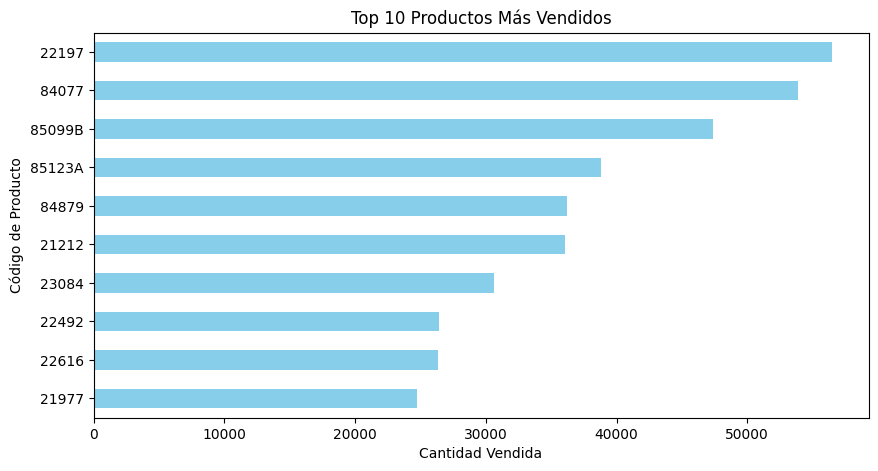

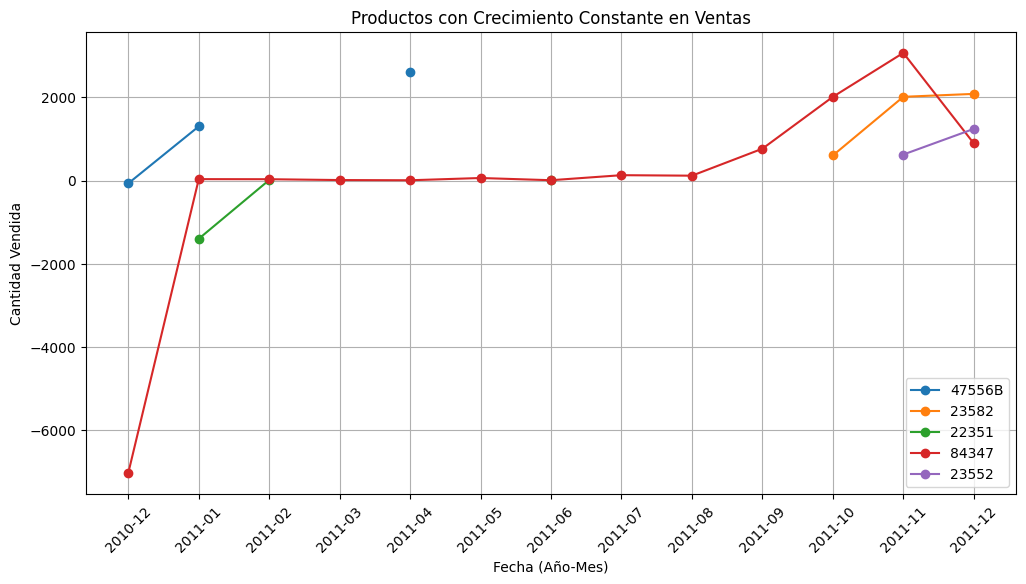

In [17]:

# 1️⃣ **Productos más vendidos**
top_vendidos = df_train.groupby("StockCode")["Quantity"].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_vendidos.sort_values().plot(kind="barh", color="skyblue")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Código de Producto")
plt.title("Top 10 Productos Más Vendidos")
plt.show()

# 2️⃣ **Productos con crecimiento constante**
# Agrupar ventas por mes y por producto
ventas_mensuales = df_train.groupby(["Año-Mes", "StockCode"])["Quantity"].sum().unstack()

# Calcular la pendiente para detectar crecimiento constante
pendientes = ventas_mensuales.apply(lambda x: x.dropna().diff().mean(), axis=0)

# Seleccionar productos con pendiente positiva (crecimiento)
productos_crecimiento = pendientes[pendientes > 0].nlargest(5).index
ventas_crecimiento = ventas_mensuales[productos_crecimiento]

# Graficar la evolución de los productos con crecimiento constante
plt.figure(figsize=(12, 6))
for producto in productos_crecimiento:
    plt.plot(ventas_crecimiento.index.astype(str), ventas_crecimiento[producto], marker="o", label=producto)

plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad Vendida")
plt.title("Productos con Crecimiento Constante en Ventas")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 🔹 ¿Cuáles son los productos con más devoluciones o cancelaciones?

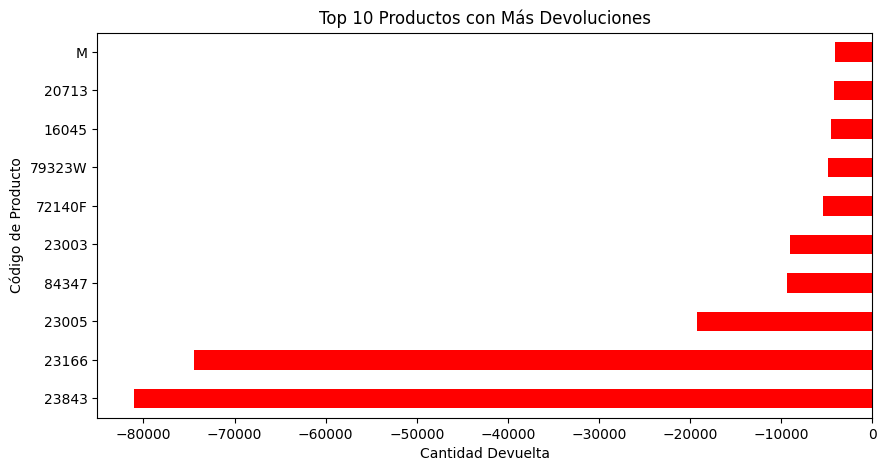

In [18]:
# Filtrar devoluciones (ventas negativas)
devoluciones = df_train[df_train["Quantity"] < 0]

# Agrupar por producto y sumar las cantidades devueltas
top_devoluciones = devoluciones.groupby("StockCode")["Quantity"].sum().nsmallest(10)

# Graficar los productos con más devoluciones
plt.figure(figsize=(10, 5))
top_devoluciones.sort_values().plot(kind="barh", color="red")
plt.xlabel("Cantidad Devuelta")
plt.ylabel("Código de Producto")
plt.title("Top 10 Productos con Más Devoluciones")
plt.show()

## 2️⃣ Rentabilidad y márgenes de ganancia

Para calcular el margen de ganancia promedio por producto, necesitamos conocer:

Precio unitario (UnitPrice): Precio de venta del producto.
Costo unitario (CostoUnitario): Si no está en los datos, podemos estimarlo con un margen típico (por ejemplo, 50% del precio).

Margen de ganancia=( 
Precio de Venta
Precio de Venta−Costo
​
 )×100

C:\Users\josep\AppData\Local\Temp\ipykernel_12564\1775850413.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_margen, x="StockCode", y="MargenGanancia", ax=axes[0], palette="Blues_r")
C:\Users\josep\AppData\Local\Temp\ipykernel_12564\1775850413.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\josep\AppData\Local\Temp\ipykernel_12564\1775850413.py:36: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=baja_rentabilidad, x="Quantity", y="MargenGanancia", hue="StockCode", ax=axes[2], palette="coolwarm", s=100)


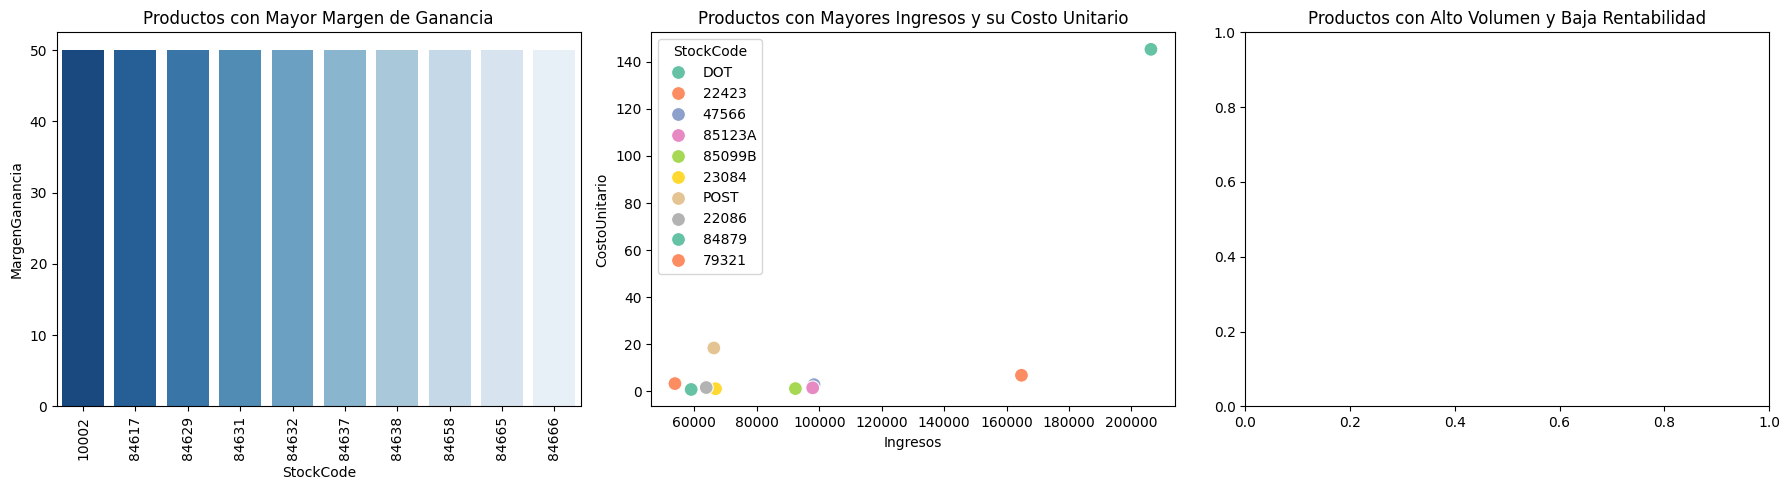

In [19]:
# Suponemos que el costo unitario es el 50% del precio de venta si no tenemos la info
df_train["CostoUnitario"] = df_train["UnitPrice"] * 0.5  

# Calculamos el margen de ganancia por producto
df_train["MargenGanancia"] = ((df_train["UnitPrice"] - df_train["CostoUnitario"]) / df_train["UnitPrice"]) * 100  

# Calculamos los ingresos totales por producto
df_train["Ingresos"] = df_train["Quantity"] * df_train["UnitPrice"]

# Agrupamos por producto
productos = df_train.groupby("StockCode").agg({
    "MargenGanancia": "mean",
    "Ingresos": "sum",
    "CostoUnitario": "mean",
    "Quantity": "sum"
}).reset_index()

# Ordenamos por los valores más altos
top_margen = productos.sort_values(by="MargenGanancia", ascending=False).head(10)
top_ingresos = productos.sort_values(by="Ingresos", ascending=False).head(10)
baja_rentabilidad = productos[(productos["Quantity"] > productos["Quantity"].quantile(0.75)) & 
                              (productos["MargenGanancia"] < productos["MargenGanancia"].median())]

# Configurar las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 📌 1. Margen de ganancia promedio por producto
sns.barplot(data=top_margen, x="StockCode", y="MargenGanancia", ax=axes[0], palette="Blues_r")
axes[0].set_title("Productos con Mayor Margen de Ganancia")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# 📌 2. Productos con mayores ingresos y su costo unitario
sns.scatterplot(data=top_ingresos, x="Ingresos", y="CostoUnitario", hue="StockCode", ax=axes[1], palette="Set2", s=100)
axes[1].set_title("Productos con Mayores Ingresos y su Costo Unitario")
# 📌 3. Productos con alto volumen pero baja rentabilidad
sns.scatterplot(data=baja_rentabilidad, x="Quantity", y="MargenGanancia", hue="StockCode", ax=axes[2], palette="coolwarm", s=100)
axes[2].set_title("Productos con Alto Volumen y Baja Rentabilidad")

plt.tight_layout()
plt.show()



## 3️⃣ Comportamiento del cliente

C:\Users\josep\AppData\Local\Temp\ipykernel_12564\766333174.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_frecuentes.index, y=clientes_frecuentes.values, ax=axes[0], palette="Blues_r")
C:\Users\josep\AppData\Local\Temp\ipykernel_12564\766333174.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\josep\AppData\Local\Temp\ipykernel_12564\766333174.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recompra_productos.index, y=recompra_productos.values, ax=axes[1], palette="Reds_r")
C:\Users\josep\AppData\Local\Temp\

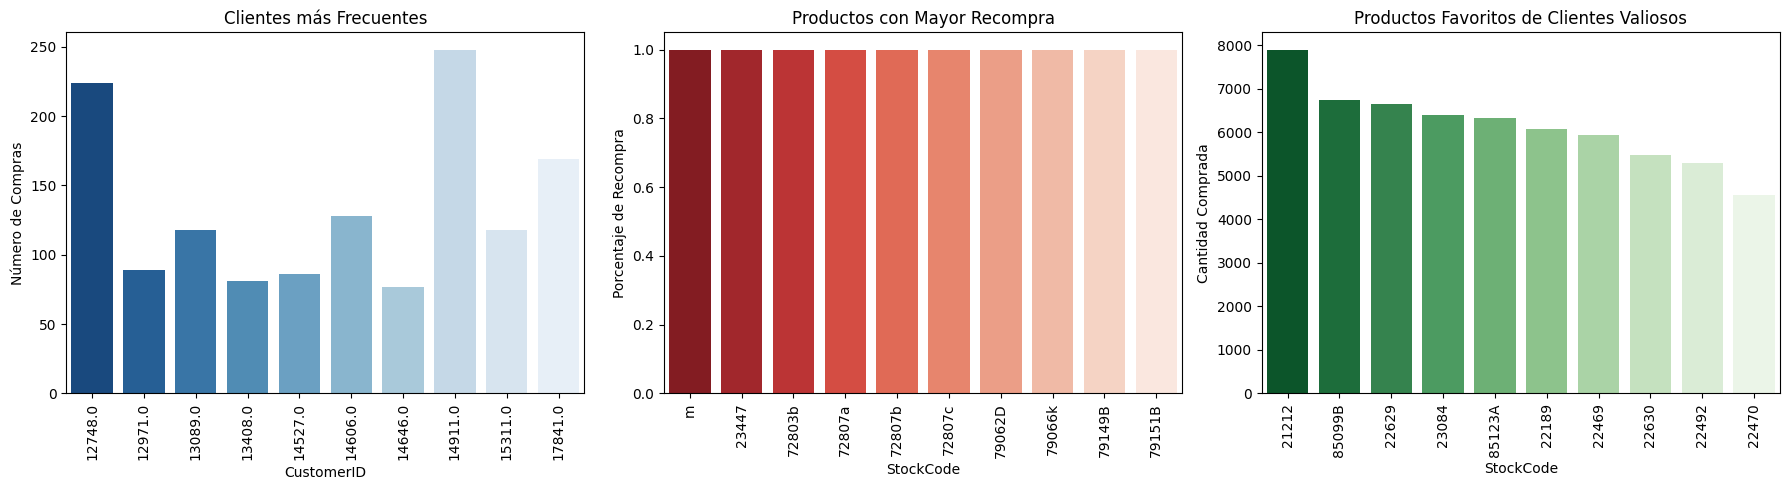

In [20]:


# 1️⃣ Clientes más frecuentes y productos más comprados
clientes_frecuentes = df_train.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending=False).head(10)
productos_favoritos = df_train.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)

# 2️⃣ Productos con alto porcentaje de recompra
recompra_productos = df_train.groupby("StockCode")["CustomerID"].nunique() / df_train["StockCode"].value_counts()
recompra_productos = recompra_productos.sort_values(ascending=False).head(10)

# 3️⃣ Clientes de alto valor y sus preferencias
df_train["TotalSpent"] = df_train["Quantity"] * df_train["UnitPrice"]
clientes_valiosos = df_train.groupby("CustomerID")["TotalSpent"].sum().sort_values(ascending=False).head(10)
productos_top_clientes = df_train[df_train["CustomerID"].isin(clientes_valiosos.index)].groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(10)

# 🔥 Gráficos 🔥
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 📌 1. Clientes más frecuentes y sus productos favoritos
sns.barplot(x=clientes_frecuentes.index, y=clientes_frecuentes.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Clientes más Frecuentes")
axes[0].set_xlabel("CustomerID")
axes[0].set_ylabel("Número de Compras")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# 📌 2. Productos con mayor recompra
sns.barplot(x=recompra_productos.index, y=recompra_productos.values, ax=axes[1], palette="Reds_r")
axes[1].set_title("Productos con Mayor Recompra")
axes[1].set_xlabel("StockCode")
axes[1].set_ylabel("Porcentaje de Recompra")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# 📌 3. Preferencias de los clientes de alto valor
sns.barplot(x=productos_top_clientes.index, y=productos_top_clientes.values, ax=axes[2], palette="Greens_r")
axes[2].set_title("Productos Favoritos de Clientes Valiosos")
axes[2].set_xlabel("StockCode")
axes[2].set_ylabel("Cantidad Comprada")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


## 4️⃣ Factores externos y tendencias

✅ Si ves picos en ciertos meses, puedes detectar estacionalidad (Ejemplo: Navidad, Black Friday).



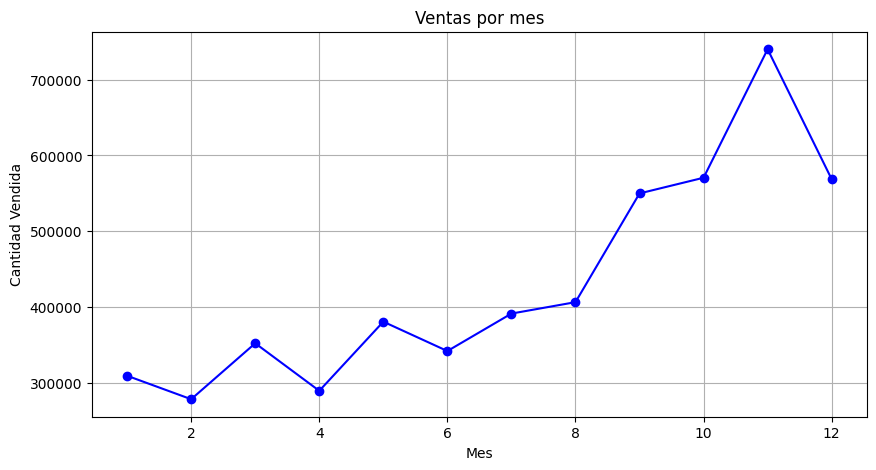

In [21]:
df_train["Mes"] = df_train["InvoiceDate"].dt.month  # Extraer el mes
ventas_por_mes = df_train.groupby("Mes")["Quantity"].sum()  # Sumar las ventas por mes


ventas_por_mes.plot(kind="line", marker="o", color="b", figsize=(10,5))
plt.title("Ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida")
plt.grid(True)
plt.show()



¿El país de origen del cliente afecta la popularidad de un producto?


✅ Podrás ver qué países generan más ventas y comparar la popularidad de productos en distintos países

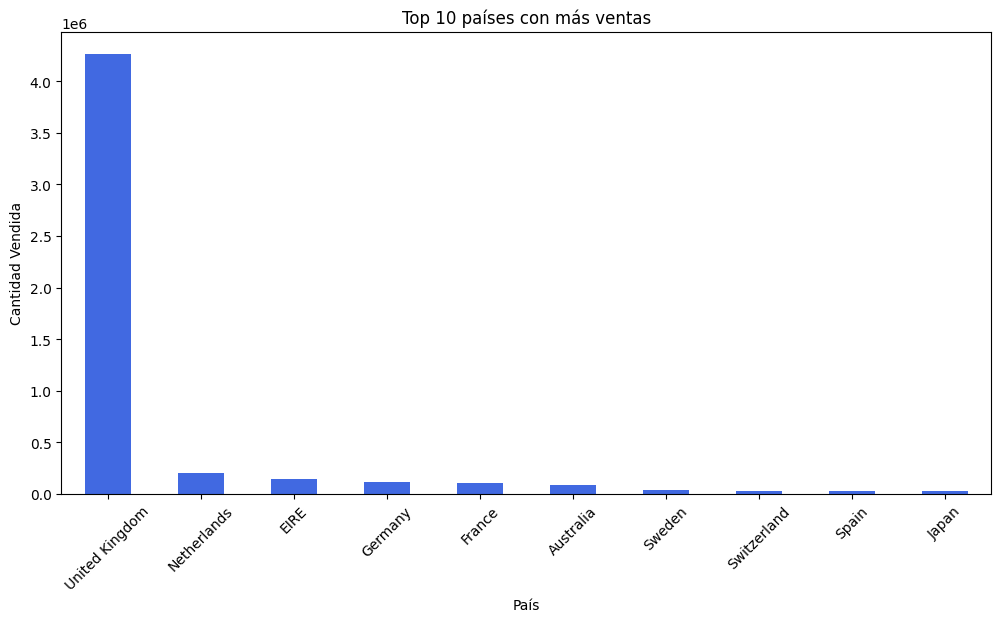

In [22]:
ventas_por_pais = df_train.groupby("Country")["Quantity"].sum().sort_values(ascending=False)

# Gráfico de barras
ventas_por_pais[:10].plot(kind="bar", color="royalblue", figsize=(12,6))
plt.title("Top 10 países con más ventas")
plt.xlabel("País")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()


¿Cuáles son las tendencias en productos similares en la industria?

✅ Si un producto crece en ventas con el tiempo, puede indicar una tendencia en la industria.

C:\Users\josep\AppData\Local\Temp\ipykernel_12564\449720971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["Fecha"] = df_top["InvoiceDate"].dt.to_period("M")  # Agrupamos por mes


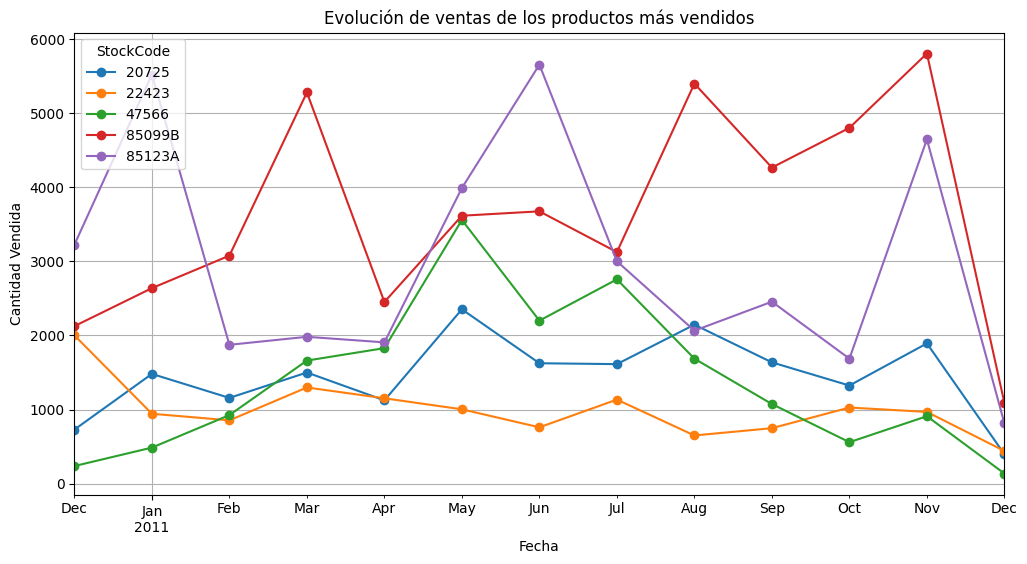

In [23]:
productos_top = df_train["StockCode"].value_counts().nlargest(5).index  # Top 5 productos
df_top = df_train[df_train["StockCode"].isin(productos_top)]  # Filtramos solo esos productos
df_top["Fecha"] = df_top["InvoiceDate"].dt.to_period("M")  # Agrupamos por mes

ventas_productos = df_top.groupby(["Fecha", "StockCode"])["Quantity"].sum().unstack()

# Graficar la evolución de los productos más vendidos
ventas_productos.plot(figsize=(12,6), marker="o")
plt.title("Evolución de ventas de los productos más vendidos")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Vendida")
plt.legend(title="StockCode")
plt.grid(True)
plt.show()


## ANALISIS DE INVERSION Y PREDICCION

Para analizar una inversión y predecir su rendimiento en ventas, podemos aplicar modelos de series de tiempo, regresiones estadísticas y análisis financiero. Aquí te dejo un enfoque estructurado:

🔹 1️⃣ Evaluar el Retorno de Inversión (ROI)

ROI = GANANCIA NETA / COSTO DE LA INVERSION * 100

In [24]:
df_train["Ganancia"] = (df_train["UnitPrice"] * df_train["Quantity"])  # Ingreso total por producto
df_inversion = df_train.groupby("StockCode").agg({"Ganancia": "sum", "UnitPrice": "mean"})
df_inversion["Inversion"] = df_inversion["UnitPrice"] * 100  # Supongamos que se compraron 100 unidades

df_inversion["ROI"] = (df_inversion["Ganancia"] - df_inversion["Inversion"]) / df_inversion["Inversion"] * 100

# Ver los productos con mejor ROI
df_inversion.sort_values("ROI", ascending=False).head(10)


,Ganancia,UnitPrice,Inversion,ROI
StockCode,,,,
22197,50987.47,1.034627,103.462737,49180.998566
84077,13587.93,0.319908,31.990775,42374.525982
85099B,92356.03,2.470264,247.026401,37287.109064
84879,58959.73,1.720885,172.088549,34161.274489
85123A,97894.50,3.103238,310.323822,31445.918521
23084,66756.59,2.339766,233.976570,28431.314076
21212,21059.72,0.755986,75.598556,27757.304592
22355,29164.36,1.206261,120.626096,24077.487997
22492,16810.42,0.781564,78.156410,21408.690004


1️⃣ Preparar los datos
Necesitamos una serie de tiempo con fecha e ingresos totales por mes.

📌 Código para agrupar por mes y preparar la serie temporal:

In [29]:
import statsmodels.api as sm

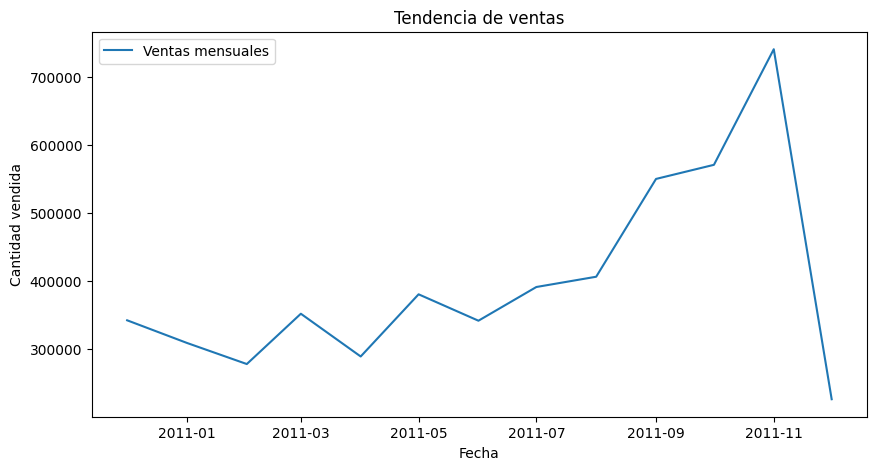

In [30]:

# Asegurar que InvoiceDate es de tipo datetime
df_train["InvoiceDate"] = pd.to_datetime(df_train["InvoiceDate"])

# Crear la columna Año-Mes si no la tienes
df_train["Año-Mes"] = df_train["InvoiceDate"].dt.to_period("M")

# Agrupar ventas por mes
df_ventas = df_train.groupby("Año-Mes")["Quantity"].sum().reset_index()

# Convertir Año-Mes a datetime y establecer como índice
df_ventas["Año-Mes"] = df_ventas["Año-Mes"].astype(str)
df_ventas["Año-Mes"] = pd.to_datetime(df_ventas["Año-Mes"])
df_ventas.set_index("Año-Mes", inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(df_ventas, label="Ventas mensuales")
plt.xlabel("Fecha")
plt.ylabel("Cantidad vendida")
plt.title("Tendencia de ventas")
plt.legend()
plt.show()


🔹 2️⃣  Modelo ARIMA (AutoRegressive Integrated Moving Average)

In [36]:
df_ventas.index = df_ventas.index.to_timestamp()


In [37]:
print(df_ventas.index)
print(df_ventas.dtypes)


DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01'],
              dtype='datetime64[ns]', name='Año-Mes', freq='MS')
Quantity    int64
dtype: object


c:\Users\josep\OneDrive\Escritorio\Proyectos-Junior\LibreriaProyecto3.11\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


C:\Users\josep\AppData\Local\Temp\ipykernel_12564\1348041054.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df_ventas.index[-1], periods=6, freq="M"), pred_futuro, label="Predicción", linestyle="dashed", color="red")


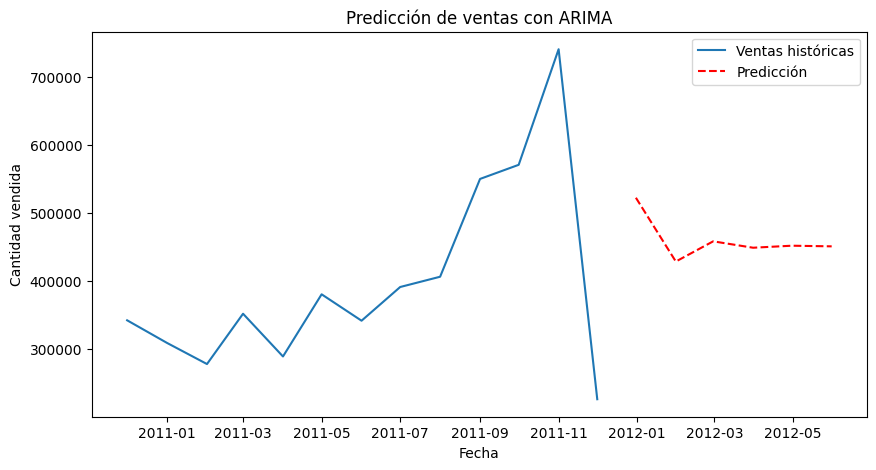

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA (p=1, d=1, q=1 como valores iniciales, puedes ajustarlos)
modelo_arima = ARIMA(df_ventas, order=(1,1,1))
resultado = modelo_arima.fit()

# Predicción de los próximos 6 meses
pred_futuro = resultado.forecast(steps=6)

# Visualizar la predicción
plt.figure(figsize=(10, 5))
plt.plot(df_ventas, label="Ventas históricas")
plt.plot(pd.date_range(start=df_ventas.index[-1], periods=6, freq="M"), pred_futuro, label="Predicción", linestyle="dashed", color="red")
plt.xlabel("Fecha")
plt.ylabel("Cantidad vendida")
plt.title("Predicción de ventas con ARIMA")
plt.legend()
plt.show()
